# Agriculture Crop Damage Analysis

Table of Contents

1.  Intoduction
2.  Data Preprocessing
3.  Data Vizualization
4.  EDA
5.  Model Testing
6.  Ensemble Tecniques
7.  GridsearchCv
8.  BestModel
9.  Cross Validation
10. Saving the best Model
11. Data preprocessing & EDA for test CSV
12. Predicting Target column


# Introduction

This is a dataset for Agriculture crop damage. This contains two datasets one is train and other is test. In this we will do 
analysis in train csv dataset. then bt anylysing the best model will pass our test csv through this model.

Train dataset contains 4599 rows and 10 columns. Test dataset contains 1199 rows and 9 columns.

Task: Classification
    
Target: Crop_Damage

# Data Preprocessing

In [132]:
# imorting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [133]:
#loading Dataset
df=pd.read_csv("train_agriculture.csv")
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [134]:
#checking for null values
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [135]:
# filling for null values
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median')
df['Number_Weeks_Used']=imp.fit_transform(df['Number_Weeks_Used'].values.reshape(-1,1))

In [136]:
# again checking for null values
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [137]:
#cheking datatypes
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [138]:
# dropping id column as unneccesary for analysis
df.drop('ID',axis=1,inplace=True)

In [139]:
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.428238,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002036,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093690,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.367823,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099903,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.428238,-0.002036,-0.093690,0.367823,0.099903,1.000000,-0.445483,-0.010814,0.231439
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.445483,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010814,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231439,-0.152918,-0.016196,1.000000


Here we can see the correlation between the columns. For better understanding lets vizualize it through heatmap correlation

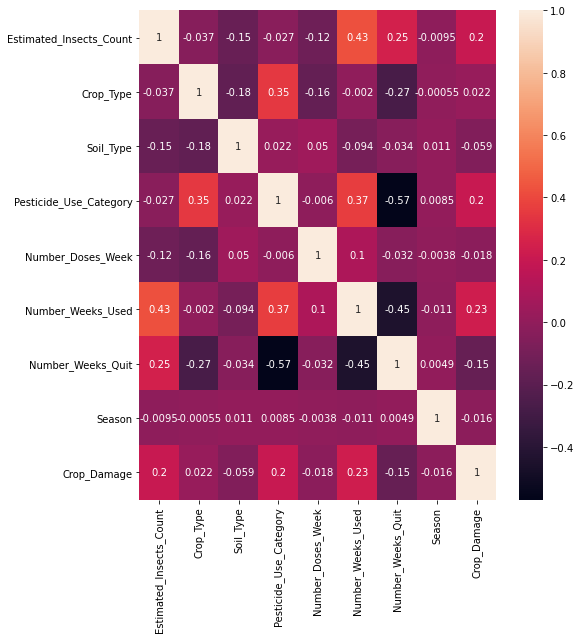

In [140]:
# heatmap
import seaborn as sns
corr_hmap=df.corr()
plt.figure(figsize=(8,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Observation: Here lighter color of the cells represents highly correlated while darker represents low correlation. we can 
    see that no. os weeks used is high correlated & no. of weeks quit is less correlated with target variable(crop damage).

# Data Vizualization

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 <a list of 10 Text major ticklabel objects>)

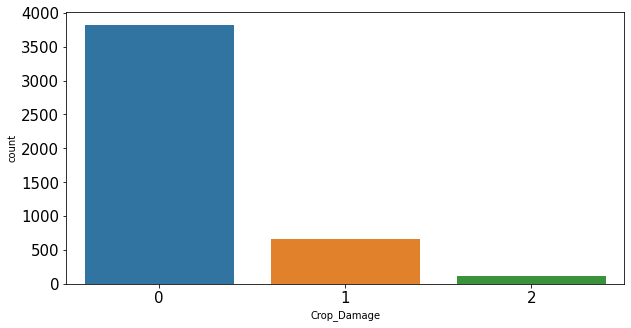

In [141]:
# plot for Crop Damage 
plt.figure(figsize=[10,5])
sns.countplot(x = 'Crop_Damage', data = df)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 10 Text major ticklabel objects>)

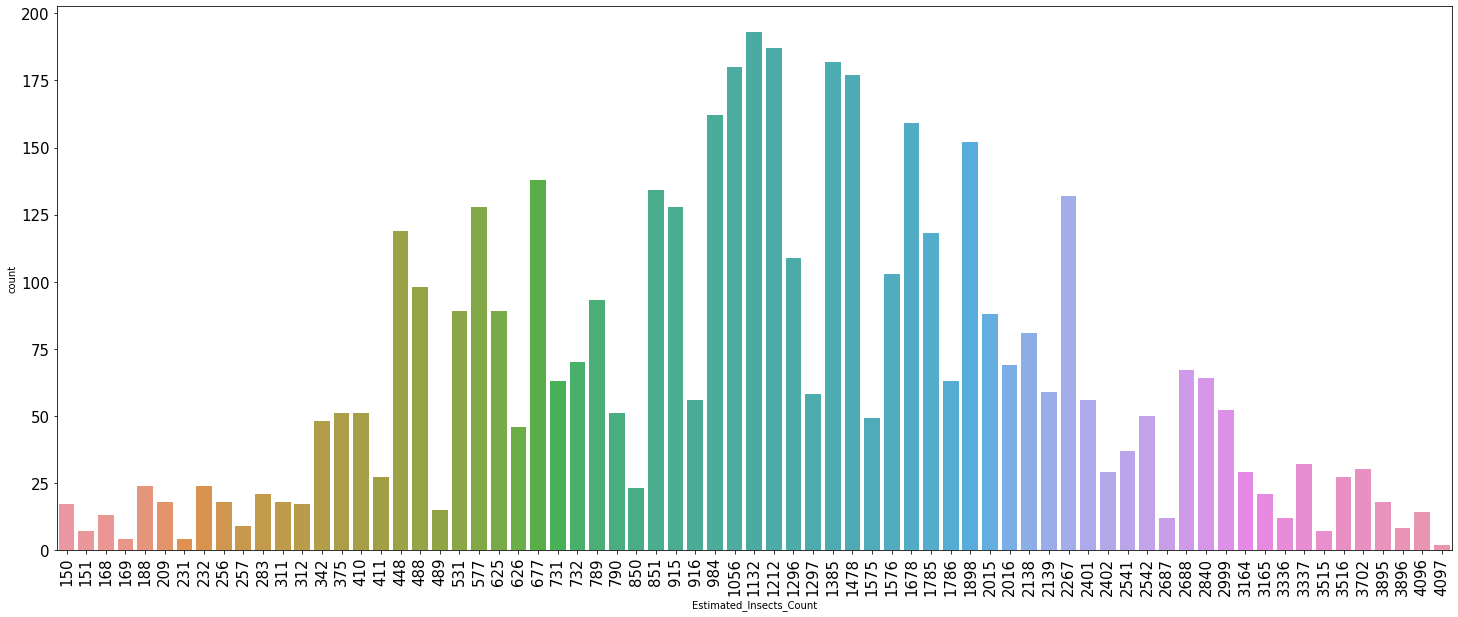

In [142]:
# plot for Estimated insects count 
plt.figure(figsize=[25,10])
sns.countplot(x = 'Estimated_Insects_Count', data = df)
plt.xticks(rotation = 90,fontsize = 15)
plt.yticks(fontsize = 15)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text major ticklabel objects>)

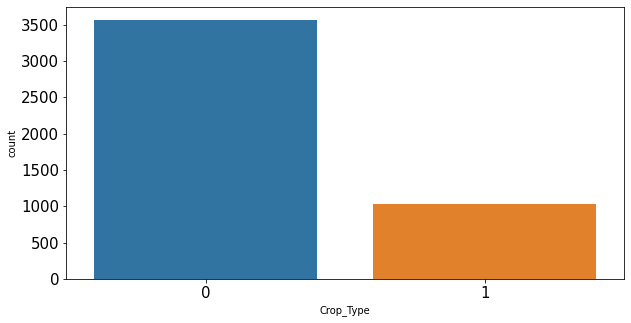

In [143]:
# plot for Crop type
plt.figure(figsize=[10,5])
sns.countplot(x = 'Crop_Type', data = df)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

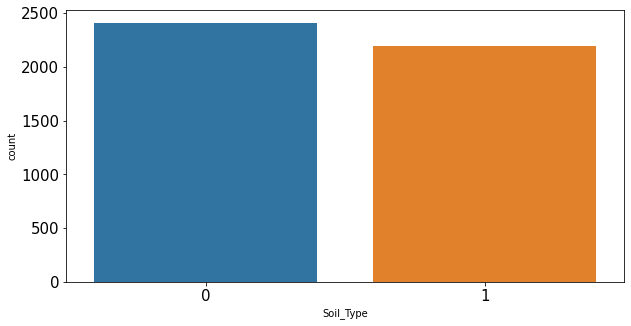

In [144]:
# plot for soil type
plt.figure(figsize=[10,5])
sns.countplot(x = 'Soil_Type', data = df)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

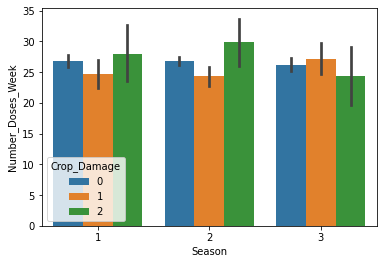

In [145]:
sns.barplot(y=df['Number_Doses_Week'],x=df['Season'],hue=df['Crop_Damage'])

# EDA

Estimated_Insects_Count       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Crop_Type                  AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Soil_Type                   AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Pesticide_Use_Category     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Number_Doses_Week          AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Number_Weeks_Used                AxesSubplot(0.125,0.125;0.133621x0.343182)
Number_Weeks_Quit             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Season                         AxesSubplot(0.44569,0.125;0.133621x0.343182)
Crop_Damage                   AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

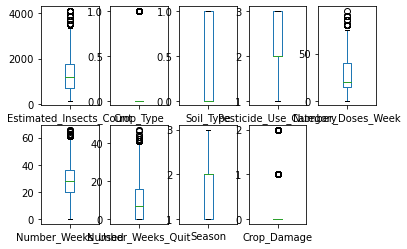

In [146]:
# checking outliers
df.plot.box(subplots=True,layout=(2,5))

 We will not remove outliers as after removing it is deleting class 2 fully from target column which is not good and make us realise that it may be one of its property

In [147]:
#splitting the data for training and test

df_x=df.drop(columns=['Crop_Damage'])
y=df['Crop_Damage']

In [148]:
#checking skewness
df_x.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.299898
Number_Weeks_Quit          0.919771
Season                     0.144841
dtype: float64

In [149]:
# treating skewness using log

for col in df_x.columns:
    if df_x.skew().loc[col]>0.55:
        df_x[col]=np.cbrt(df_x[col])

In [150]:
df_x.skew()

Estimated_Insects_Count    0.020932
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.404207
Number_Doses_Week         -0.745158
Number_Weeks_Used          0.299898
Number_Weeks_Quit         -0.274154
Season                     0.144841
dtype: float64

In [151]:
#Lets again check the skewness
print("Total count of numeric features: ",len(df_x.skew()))
print("count of features which are significantly skewed: ",len(df_x.skew().loc[abs(df_x.skew())>0.55]))

Total count of numeric features:  8
count of features which are significantly skewed:  2


In [152]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df_x)


# Sending Data to Models

In [153]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [155]:
model=[LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n') 

Accuracy Score of LogisticRegression() is:
0.8330039525691699
[[835   7   0]
 [139   8   0]
 [ 22   1   0]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       842
           1       0.50      0.05      0.10       147
           2       0.00      0.00      0.00        23

    accuracy                           0.83      1012
   macro avg       0.45      0.35      0.34      1012
weighted avg       0.77      0.83      0.77      1012



Accuracy Score of SVC() is:
0.8389328063241107
[[841   1   0]
 [139   8   0]
 [ 22   1   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       842
           1       0.80      0.05      0.10       147
           2       0.00      0.00      0.00        23

    accuracy                           0.84      1012
   macro avg       0.55      0.35      0.34      1012
weighted avg       0.81      0.84      0.77      1012



Accuracy Score of KNeighborsClass

# Using Ensemble techniques for boosting scores

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


In [157]:
model=[RandomForestClassifier(),AdaBoostClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n') 

Accuracy Score of RandomForestClassifier() is:
0.8369565217391305
[[817  23   2]
 [117  30   0]
 [ 17   6   0]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       842
           1       0.51      0.20      0.29       147
           2       0.00      0.00      0.00        23

    accuracy                           0.84      1012
   macro avg       0.46      0.39      0.40      1012
weighted avg       0.79      0.84      0.80      1012



Accuracy Score of AdaBoostClassifier() is:
0.8389328063241107
[[835   7   0]
 [133  14   0]
 [ 18   5   0]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       842
           1       0.54      0.10      0.16       147
           2       0.00      0.00      0.00        23

    accuracy                           0.84      1012
   macro avg       0.46      0.36      0.36      1012
weighted avg       0.78      0.84      0.78      1012





# Using GridsearchCV

In [158]:
from sklearn.model_selection import GridSearchCV

In [159]:
# using GridsearchCV ti fing best parmeters of SVC
sv=SVC()
parameters={'kernel':['rbf','linear','poly']}
clf=GridSearchCV(sv,parameters)
clf.fit(x,y)
clf.best_params_

{'kernel': 'poly'}

# Best Model

In [160]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8389328063241107
[[841   1   0]
 [139   8   0]
 [ 22   1   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       842
           1       0.80      0.05      0.10       147
           2       0.00      0.00      0.00        23

    accuracy                           0.84      1012
   macro avg       0.55      0.35      0.34      1012
weighted avg       0.81      0.84      0.77      1012



# Cross Validation

In [161]:
#cross validation
from sklearn.model_selection import cross_val_score

scores=cross_val_score(svc,x,y,cv=5)
print(scores)
print(scores.mean(),scores.std())

[0.8423913  0.83043478 0.84130435 0.83043478 0.83133841]
0.8351807257415906 0.005464476623646511


# Saving the Model

In [162]:
import joblib
joblib.dump(svc,'Agriculture_Analysis.obj') 

['Agriculture_Analysis.obj']

# Data preprocessing for test csv

In [163]:
#loading test csv
df_new=pd.read_csv("test_agriculture.csv")
df_new

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [164]:
# checking null values
df_new.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [165]:
# filling for null values
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median')
df_new['Number_Weeks_Used']=imp.fit_transform(df_new['Number_Weeks_Used'].values.reshape(-1,1))

In [166]:
df_new.drop('ID',axis=1,inplace=True)

# EDA for test csv

In [167]:
df_new.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.245465
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

In [168]:
for col in df_new.columns:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.sqrt(df_new[col])

In [169]:
df_new.skew()

Estimated_Insects_Count    0.481273
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week         -0.149741
Number_Weeks_Used          0.245465
Number_Weeks_Quit          0.391417
Season                     0.155872
dtype: float64

# Predicting Target value for test csv

In [170]:
df_new['crop_damage']=svc.predict(df_new)

In [171]:
df_new['crop_damage']

0       2
1       0
2       1
3       1
4       1
       ..
1194    2
1195    2
1196    2
1197    2
1198    2
Name: crop_damage, Length: 1199, dtype: int64